In [1]:
from client_side.client import client
from server_side.workers import phone_support
from server_side.vm import vm_deliver
from server_side.server import server
from settings.statistic import statistic_collector
from simpy import Environment
import matplotlib.pyplot as plt
import pandas
import numpy as np

time = 400
skip = 0
env = Environment()
client(env, phone_support(env), vm_deliver(env, server(env, "server")))
env.run(until=time)
statistic_collector.save()

In [2]:
# for key in statistic_collector.load:
#     print(f"{key}: {statistic_collector.load[key]}")

In [3]:
df = pandas.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for key in statistic_collector.load:
    if key[:10] == "client_vms":
        if len(statistic_collector.load[key]) == 1 and statistic_collector.load[key][0] == 0:
            continue
        # plt.plot(statistic_collector.load[key])
        x = [np.NaN] * (time // 2 - len(statistic_collector.load[key])) + statistic_collector.load[key]
        df[key] = np.array(x)
        
df['mean'] = df.mean(axis=1)        
df["sum"] = df.sum(axis=1)
df1 = df.iloc[skip:]
df.head()


,client_vms_1,client_vms_12,client_vms_123,client_vms_124,client_vms_1235,client_vms_1236,client_vms_1237,client_vms_18,client_vms_12359,client_vms_12360,...,client_vms_1243,client_vms_12374,client_vms_123755,client_vms_136,client_vms_12447,client_vms_28,client_vms_12369,client_vms_12390,mean,sum
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0


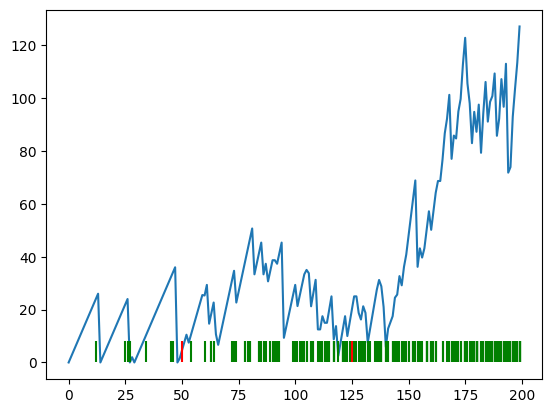

In [4]:
plt.plot(df['sum'])
plt.vlines([x // 2 for x in statistic_collector.load["break_time_vm"]], 0, df['sum'].max() // 15, 'g')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_hadoop_claster"]], 0, df['sum'].max() // 15, 'r')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_proxmox_claster"]], 0, df['sum'].max() // 15, 'r')

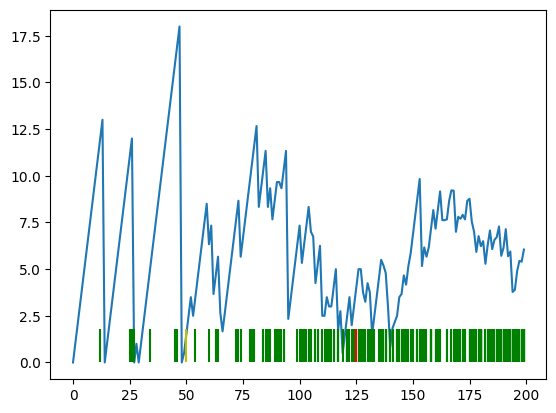

In [5]:
plt.plot(df['mean'])
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_vm"]], 0, df['mean'].max() / 10, 'g')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_hadoop_claster"]], 0, df['mean'].max() / 10, 'y')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_proxmox_claster"]], 0, df['mean'].max() / 10, 'r')